## Análise Exploratória - Medical Task Force

### 1. Tema: Análise dos impactos relacionados à distribuição de profissionais da área de saúde para atuarem em casos de COVID 19
O presente projeto visa realizar uma análise exploratória dos dados considerando a distribuição do número de profissionais de saúde (médicos, enfermeiros, fisioterapeutas) por município, número de leitos na UTI e disponibilidade de respiradores e suas respectivas correlações com a demanda (número de casos que demandaram internação) e eventual impacto em relação ao número de óbitos por COVID-19. Pretende-se determinar se a capacidade da região em relação ao número de profissionais na área de saúde impactou nos casos de óbitos por COVID-19 e verificar se há uma possível “distribuição adequada” da quantidade de profissionais de saúde por habitante, número de leitos e respiradores, que evidencie um melhor atendimento aos pacientes.


### 2. Equipe:
<ul> 
<li>David Lourenço da Costa, 233657, DavidLCostaBR, davidlcosta67@gmail.com, Pós-Graduação Ciência da Computação, UNICAMP.</li>
<li>Leidmar Magnus Festa, 1525280, leidmar, festa@alunos.utfpr.edu.br, Msc Computação Aplicada, UTFPR.</li>
<li>Vinicius Araujo, 157500, ViniciusArj, v157500@dac.unicamp.br, Pós-Graduação Geologia, UNICAMP.</li>
</ul>

### 3. Obtenção e processamento de dados:
A etapa de obtenção de dados foi dividida em três etapas distintas, porém conexas: obtenção do número de médicos, enfermeiros e fisioterapeutas por cidade, obtenção de leitos em Unidades de Terapia Intensiva (UTI) e respiradores por município e número de óbitos por cidade.

#### 3.1 Obtenção do número de médicos, enfermeiros e fisioterapeutas
Os dados do número de médicos e enfermeiros por município foram obtidos a partir da ferramenta denominada de “mapas interativos” criada pelo IBGE (“https://mapasinterativos.ibge.gov.br/covid/saude/”). O arquivo apresenta a quantidade de profissionais médicos tanto no SUS como em hospitais privados em dezembro de 2019 para cada município brasileiro, de acordo com o Cadastro Nacional de Estabelecimento de Saúde (CNES).

Os dados do número de fisioterapeutas por município foram obtidos a partir dos dados da RAIS disponibilizados pelo Ministério do Trabalho no portal PDET - PROGRAMA DE DISSEMINAÇÃO DAS ESTATÍSTICAS DO TRABALHO (“http://pdet.mte.gov.br/acesso-online-as-bases-de-dados/”). O arquivo apresenta a quantidade de fisioterapeutas com atuação específica em reabilitação respiratória (caso de UTIs) e também fisiterapeutas gerais, que, eventualmente, podem atuar de forma contingencial no atendimento de COVID-19.

#### 3.2 Obtenção do número de leitos em UTIs e respiradores
Os dados do número de leitos em UTIs para cada cidade brasileira, assim como os dados de médicos e enfermeiros por município, foram obtidos a partir dos dados do IBGE. Deve-se destacar que tais dados representam o número de leitos em UTIs presentes no CNES até dezembro de 2019. 

#### 3.3 Obtenção do número de óbitos por município

Os dados do número de óbitos em decorrência da COVID-19 foram obtidos a partir Sistema de Informação sobre Mortalidade – SIM (“https://opendatasus.saude.gov.br/dataset/sistema-de-informacao-sobre-mortalidade”). O arquivo apresenta o registro de todos os óbitos ocorridos por município.
Foi realizado um corte dos óbitos referentes a COVID-19, que, segundo o Ministério da Saúde corresponde aos marcadores "B34.2" e "U07.1", conforme apresentado em: http://portalarquivos2.saude.gov.br/images/pdf/2020/April/29/Nota-Informativa-declara----o-obito.pdf

#### 3.4 Processamento dos dados
Utilizando os datasets anteriormente indicados, foram obtidas as informações básicas sobre as equipes médicas compostas de médicos, enfermeiros, fisioterapeutas (tratados aqui como Profissionais de Saúde); dados de leitos em UTIs e respiradores que compõem as instalações utilizadas para atendimento aos casos de COVID-19 graves que demandam um suporte hospitalar especializado. Esses dados foram então consolidados junto com os indicadores de óbitos, gerando um único arquivo denominado "DadosConsolidados.csv", que serviu como fontes de dados para as análises realizadas.

### 4. Cobertura e distribuição dos dados

#### 4.1 Análise inicial dos dados de médicos, enfermeiros e fisioterapeutas

Na etapa de avaliação da cobertura e distribuição dos dados do número de médicos, enfermeiros e fisioterapeutas, foi utilizado o arquivo denominado de “DadosConsolidados.csv”. Nas análises deste tópico serão utilizados dados referentes aos profissionais de saúde por município, tratados aqui como sendo a soma do número de médicos, enfermeiros e fisioterapeutas.

In [1]:
# Importando as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importando o arquivo com os dados que serão utilizados
dfDados = pd.read_csv('./data/DadosConsolidados.csv', delimiter=";", encoding='latin-1')


#definindo os indexes:
dfDados = dfDados.set_index('Codigo_Municipio')

In [4]:
# Panorama geral de como o arquivo é estruturado
dfDados.sample(10)

Nome_municipio     Nome_Estado    Região  Pop_Total  \
Codigo_Municipio                                                            
3515202              Estrela d'Oeste       São Paulo   Sudeste       8419   
3155306                    Rio Manso    Minas Gerais   Sudeste       5832   
2906600                      Candiba           Bahia  Nordeste      14319   
1101484           São Felipe D'Oeste        Rondônia     Norte       5172   
3553401                       Tanabi       São Paulo   Sudeste      25967   
4206108                    Grão Pará  Santa Catarina       Sul       6569   
3111903                   Cana Verde    Minas Gerais   Sudeste       5603   
1504059                   Mãe do Rio            Pará     Norte      30077   
3159001            Santana do Riacho    Minas Gerais   Sudeste       4295   
3117836               Cônego Marinho    Minas Gerais   Sudeste       7642   

                  Total_Obitos  Total_Medicos  Total_Enfermeiros  \
Codigo_Municipio                                                   
3515202                      0             14                 12   
3155306                      0              3                  3   
2906600                      0              5                  7   
1101484                      0              4                  4   
3553401                      0             51                 12   
4206108                      0              2                  5   
3111903                      0              1                  4   
1504059                      0             15                 17   
3159001                      0              4                  3   
3117836                      0              5                  8   

                  Total_Fisio_Respiratoria  Total_Fisio_Geral  \
Codigo_Municipio                                                
3515202                                  0                 21   
3155306                                  0                 15   
2906600                                  0                  2   
1101484                                  0                  0   
3553401                                  0                127   
4206108                                  0                  9   
3111903                                  0                  6   
1504059                                  0                 17   
3159001                                  0                 12   
3117836                                  0                 12   

                  Total_Profissionais_Saude  Total_Leitos_UTI  \
Codigo_Municipio                                                
3515202                                  47                 0   
3155306                                  21                 0   
2906600                                  14                 0   
1101484                                   8                 0   
3553401                                 190                 0   
4206108                                  16                 0   
3111903                                  11                 0   
1504059                                  49                 0   
3159001                                  19                 0   
3117836                                  25                 0   

                  Total_Respiradores  Obitos_Por100mil  Medicos_Por100mil  \
Codigo_Municipio                                                            
3515202                            2               0.0              166.3   
3155306                            0               0.0               51.4   
2906600                            0               0.0               34.9   
1101484                            0               0.0               77.3   
3553401                            2               0.0              196.4   
4206108                            0               0.0               30.4   
3111903                            0               0.0               17.8   
1504059                  

In [4]:
# Normalização dos Dados para 100mil habitantes
dfDados['Obitos_Por100mil'] = (dfDados['Total_Obitos'] * 100000) / dfDados['Pop_Total']
dfDados['Medicos_Por100mil'] = (dfDados['Total_Medicos'] * 100000) / dfDados['Pop_Total']
dfDados['Enfermeiros_Por100mil'] = (dfDados['Total_Enfermeiros'] * 100000) / dfDados['Pop_Total']
dfDados['FisioResp_Por100mil'] = (dfDados['Total_Fisio_Respiratoria'] * 100000) / dfDados['Pop_Total']
dfDados['FisioGeral_Por100mil'] = (dfDados['Total_Fisio_Geral'] * 100000) / dfDados['Pop_Total']
dfDados['Profissionais_Por100mil'] = (dfDados['Total_Profissionais_Saude'] * 100000) / dfDados['Pop_Total']
dfDados['LeitosUTI_Por100mil'] = (dfDados['Total_Leitos_UTI'] * 100000) / dfDados['Pop_Total']
dfDados['Respiradores_Por100mil'] = (dfDados['Total_Respiradores'] * 100000) / dfDados['Pop_Total']

dfDados

Nome_municipio     Nome_Estado        Região  \
Codigo_Municipio                                                      
5200050               Abadia de Goiás           Goiás  Centro-Oeste   
3100104           Abadia dos Dourados    Minas Gerais       Sudeste   
5200100                     Abadiânia           Goiás  Centro-Oeste   
3100203                        Abaeté    Minas Gerais       Sudeste   
1500107                    Abaetetuba            Pará         Norte   
...                               ...             ...           ...   
2933604                   Xique-Xique           Bahia      Nordeste   
2517407                        Zabelê         Paraíba      Nordeste   
3557154                      Zacarias       São Paulo       Sudeste   
2114007                       Zé Doca        Maranhão      Nordeste   
4219853                        Zortéa  Santa Catarina           Sul   

                  Pop_Total  Total_Obitos  Total_Medicos  Total_Enfermeiros  \
Codigo_Municipio                                                              
5200050                8773             0             16                 10   
3100104                6989             0             14                  4   
5200100               20042             0             16                 19   
3100203               23237             0             51                 15   
1500107              157698             0             90                 81   
...                     ...           ...            ...                ...   
2933604               46483             0             12                 26   
2517407                2240             0              1                  2   
3557154                2718             0              0                  5   
2114007               51714             0             13                 30   
4219853                3363             0              0                  2   

                  Total_Fisio_Respiratoria  Total_Fisio_Geral  \
Codigo_Municipio                                                
5200050                                  0                  4   
3100104                                  0                 15   
5200100                                  0                 11   
3100203                                  0                 87   
1500107                                  0                 20   
...                                    ...                ...   
2933604                                  0                  7   
2517407                                  0                 10   
3557154                                  0                 41   
2114007                                  0                  5   
4219853                                  0                  5   

                  Total_Profissionais_Saude  ...  Medicos_Por100mil  \
Codigo_Municipio                             ...                      
5200050                                  30  ...         182.377750   
3100104                                  33  ...         200.314780   
5200100                                  46  ...          79.832352   
3100203                                 153  ...         219.477557   
1500107                                 191  ...          57.071111   
...                                     ...  ...                ...   
2933604                                  45  ...          25.815890   
2517407                                  13  ...          44.642857   
3557154                                  46  ...           0.000000   
2114007                                  48  ...          25.138260   
4219853                                   7  ...           0.000000   

                  Enfermeiros_Por100mil  FisioResp_Por100mil  \
Codigo_Municipio                                               
5200050                      113.986094                  0.0   
3100104                       57.232794                  0.0   
5200100                       94.800918      

In [5]:
# Retirando colunas que não serão utilizadas neste momento
dfDados= dfDados.drop(['Total_Obitos', 'Total_Medicos', 'Total_Enfermeiros', 
              'Total_Fisio_Respiratoria', 'Total_Fisio_Geral',
                       'Total_Leitos_UTI', 'Total_Respiradores'], axis=1)

dfDados

Nome_municipio     Nome_Estado        Região  \
Codigo_Municipio                                                      
5200050               Abadia de Goiás           Goiás  Centro-Oeste   
3100104           Abadia dos Dourados    Minas Gerais       Sudeste   
5200100                     Abadiânia           Goiás  Centro-Oeste   
3100203                        Abaeté    Minas Gerais       Sudeste   
1500107                    Abaetetuba            Pará         Norte   
...                               ...             ...           ...   
2933604                   Xique-Xique           Bahia      Nordeste   
2517407                        Zabelê         Paraíba      Nordeste   
3557154                      Zacarias       São Paulo       Sudeste   
2114007                       Zé Doca        Maranhão      Nordeste   
4219853                        Zortéa  Santa Catarina           Sul   

                  Pop_Total  Total_Profissionais_Saude  Obitos_Por100mil  \
Codigo_Municipio                                                           
5200050                8773                         30               0.0   
3100104                6989                         33               0.0   
5200100               20042                         46               0.0   
3100203               23237                        153               0.0   
1500107              157698                        191               0.0   
...                     ...                        ...               ...   
2933604               46483                         45               0.0   
2517407                2240                         13               0.0   
3557154                2718                         46               0.0   
2114007               51714                         48               0.0   
4219853                3363                          7               0.0   

                  Medicos_Por100mil  Enfermeiros_Por100mil  \
Codigo_Municipio                                             
5200050                  182.377750             113.986094   
3100104                  200.314780              57.232794   
5200100                   79.832352              94.800918   
3100203                  219.477557              64.552223   
1500107                   57.071111              51.364000   
...                             ...                    ...   
2933604                   25.815890              55.934428   
2517407                   44.642857              89.285714   
3557154                    0.000000             183.958793   
2114007                   25.138260              58.011370   
4219853                    0.000000              59.470711   

                  FisioResp_Por100mil  FisioGeral_Por100mil  \
Codigo_Municipio                                              
5200050                           0.0             45.594437   
3100104                           0.0            214.622979   
5200100                           0.0             54.884742   
3100203                           0.0            374.402892   
1500107                           0.0             12.682469   
...                               ...                   ...   
2933604                           0.0             15.059269   
2517407                           0.0            446.428571   
3557154                           0.0           1508.462104   
2114007                           0.0              9.668562   
4219853                           0.0            148.676777   

                  TotalProf_Por100mil  TotalLeitos_Por100mil  \
Codigo_Municipio                                               
5200050                         342.0                    0.0   
3100104                         376.2                    0.0   
5200100                         524.3                    0.0   
3100203                        1744.0                    0.0   
1500107                        2177.1                    0.0   
...                               .

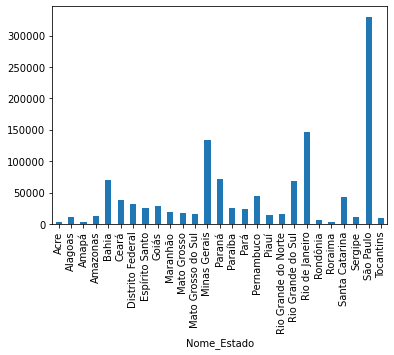

In [7]:
# Agrupando por estado brasileiro o total de profissionaios de saúde.
dfSumEstado = dfDados.groupby(['Nome_Estado']).Total_Profissionais_Saude.sum().rename('Total_Medicos') 
barrasUf = dfSumEstado.plot.bar(x='Nome_Estado', y='Total de Médicos')

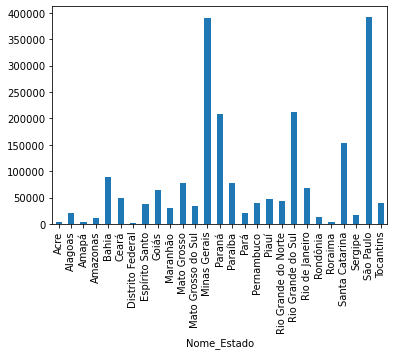

In [8]:
# Agora iremos verificar o total de profissionais normalizado
dfSumEstado1 = dfDados.groupby(['Nome_Estado']).Profissionais_Por100mil.sum().rename('Total_Medicos') 
barrasUf = dfSumEstado1.plot.bar(x='Nome_Estado', y='Total de Médicos')

Buscando entender como uma região brasileiro se comporta, selecionamos aleatoriamente a **região Sul do país**.

In [10]:
# Criando um novo DataFrame que contenha apenas a região Sul do país
dfMedMunSul = dfDados[dfDados.Região == "Sul"]

In [11]:
# Organizando os dados do novo DataFrame criado com base na quantidade de profissionais de saúde
# Note que os valores utilizados não são aqueles normalizados!
dfMedMunSul.sort_values(['Total_Profissionais_Saude'], ascending=False)

Nome_municipio        Nome_Estado Região  Pop_Total  \
Codigo_Municipio                                                           
4314902                Porto Alegre  Rio Grande do Sul    Sul    1483771   
4106902                    Curitiba             Paraná    Sul    1933105   
4205407               Florianópolis     Santa Catarina    Sul     500973   
4113700                    Londrina             Paraná    Sul     569733   
4209102                   Joinville     Santa Catarina    Sul     590466   
...                             ...                ...    ...        ...   
4310538                      Itaara  Rio Grande do Sul    Sul       5499   
4313011             Nova Candelária  Rio Grande do Sul    Sul       2698   
4310751                       Ivorá  Rio Grande do Sul    Sul       1910   
4320859                       Tabaí  Rio Grande do Sul    Sul       4719   
4322855           Vespasiano Corrêa  Rio Grande do Sul    Sul       1815   

                  Total_Profissionais_Saude  Obitos_Por100mil  \
Codigo_Municipio                                                
4314902                               21234          1.819688   
4106902                               20162          3.103815   
4205407                                5347          0.598835   
4113700                                5018          4.914583   
4209102                                4492          1.862935   
...                                     ...               ...   
4310538                                   2          0.000000   
4313011                                   2          0.000000   
4310751                                   2          0.000000   
4320859                                   2          0.000000   
4322855                                   1          0.000000   

                  Medicos_Por100mil  Enfermeiros_Por100mil  \
Codigo_Municipio                                             
4314902                  593.824788             278.277443   
4106902                  444.621477             170.347705   
4205407                  603.625345             245.322602   
4113700                  344.898400             247.659869   
4209102                  290.279203             163.260882   
...                             ...                    ...   
4310538                    0.000000              36.370249   
4313011                   37.064492              37.064492   
4310751                    0.000000             104.712042   
4320859                   21.190930              21.190930   
4322855                    0.000000              55.096419   

                  FisioResp_Por100mil  FisioGeral_Por100mil  \
Codigo_Municipio                                              
4314902                      0.067396            558.981137   
4106902                      0.931144            428.016067   
4205407                     33.135518            218.375042   
4113700                      0.000000            288.205177   
4209102                      0.000000            307.214979   
...                               ...                   ...   
4310538                      0.000000              0.000000   
4313011                      0.000000              0.000000   
4310751                      0.000000              0.000000   
4320859                      0.000000              0.000000   
4322855                      0.000000              0.000000   

                  TotalProf_Por100mil  TotalLeitos_Por100mil  \
Codigo_Municipio                                               
4314902                      242038.1                 7044.3   
4106902                      229818.8                 5380.1   
4205407                       60948.4                 1880.8   
4113700                       57198.2                 2085.9   
4209102                       51202.6                 1094.3   
...                               ...                    ...   
4310538                          22.8          

Text(0, 0.5, 'Contagem Municípios')

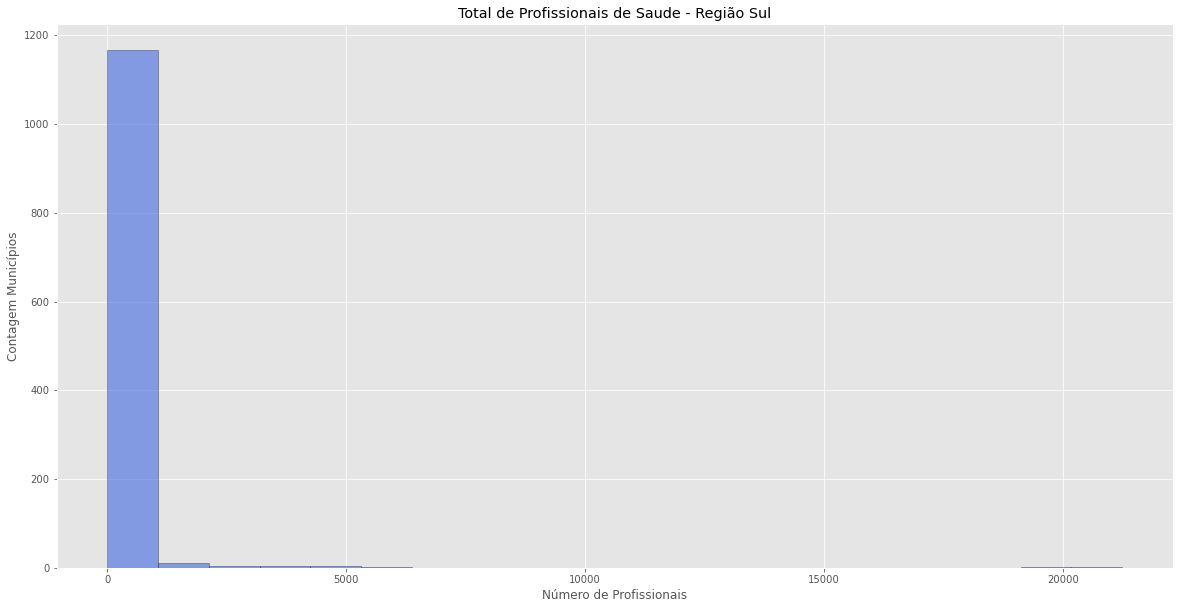

In [12]:
# Agora iremos gerar um gráfico de barras para verificar a quantidade de médicos por município
plt.style.use("ggplot")
plt.figure(figsize = (20, 10))
dfMedMunSul["Total_Profissionais_Saude"].hist(bins = 20, ec = "k", alpha = .6, color = "royalblue")
plt.title("Total de Profissionais de Saude - Região Sul")
plt.xlabel("Número de Profissionais")
plt.ylabel("Contagem Municípios")

Text(0, 0.5, 'Contagem de Municípios')

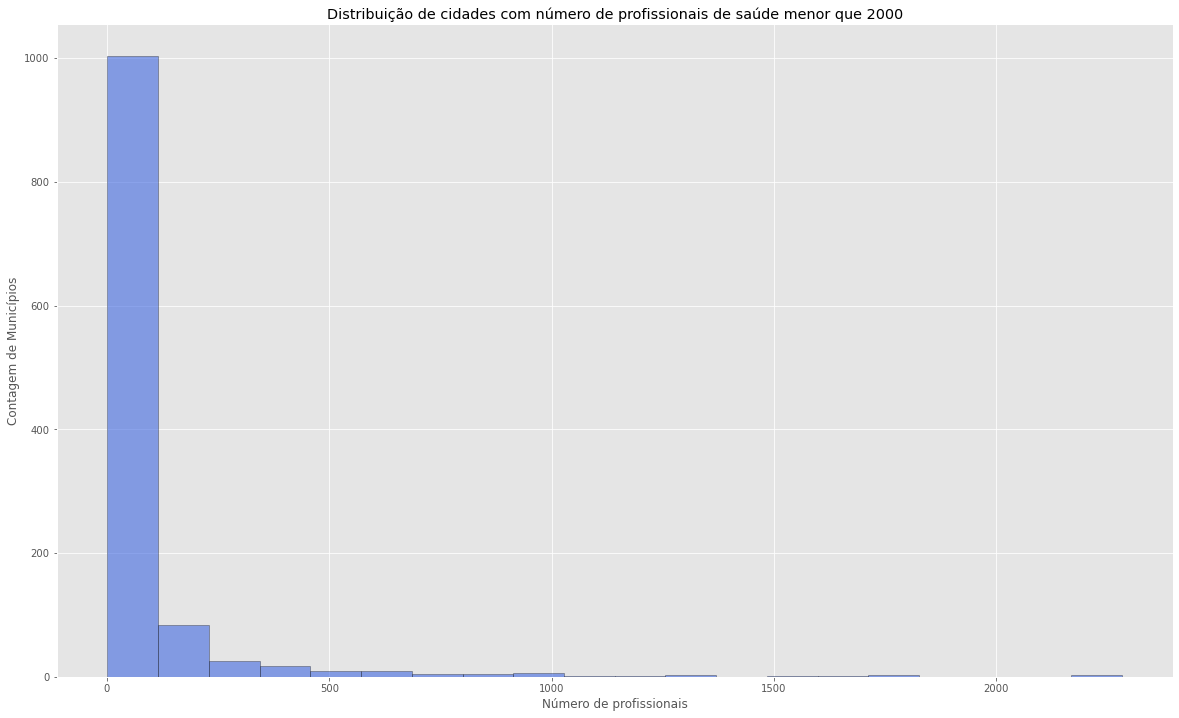

In [13]:
# Agora iremos dar um zoom no gráfico para analisar cidades apenas com menos que 2500 profissionais
plt.figure(figsize = (20, 12))
dfMedMunSul[dfMedMunSul["Total_Profissionais_Saude"] <2500]["Total_Profissionais_Saude"].hist(bins = 20, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição de cidades com número de profissionais de saúde menor que 2000")
plt.xlabel("Número de profissionais")
plt.ylabel("Contagem de Municípios")

Text(0, 0.5, 'Contagem de Municípios')

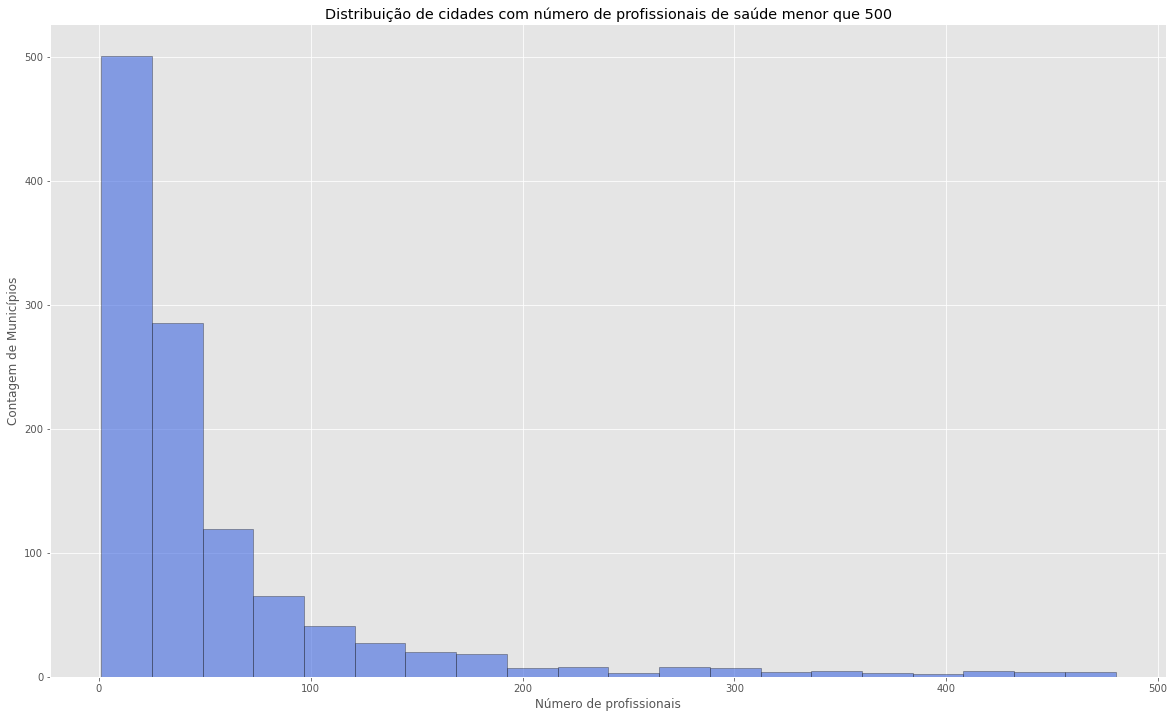

In [14]:
# Agora iremos dar um zoom no gráfico para analisar cidades apenas com menos que 500 profissionais
plt.figure(figsize = (20, 12))
dfMedMunSul[dfMedMunSul["Total_Profissionais_Saude"] <500]["Total_Profissionais_Saude"].hist(bins = 20, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição de cidades com número de profissionais de saúde menor que 500")
plt.xlabel("Número de profissionais")
plt.ylabel("Contagem de Municípios")

#### 4.2 Análise inicial dos totais de leitos de UTIs

Para análise dos dados totais de leitos de UTIs, serão utilizados os dados denominados de "Leitos_de_UTI_em_2019.csv", extraídos dos mapas interativos disponibilizados pelo IBGE.

In [15]:
#abrindo os dataSets
df = pd.read_csv('./data/mapasInterativos/Leitos_de_UTI_em_2019.csv')
df.sample(20)

X          Y  OBJECTID_1  Código_do_Município  \
1364 -38.586058  -7.214567        1365              2509602   
1362 -35.477975  -7.302506        1363              2509404   
4868 -51.080088 -29.539342        4869              4312476   
3689 -47.976695 -23.076857        3690              3537503   
1869 -38.881638 -15.860618        1870              2903409   
1534 -39.615345  -7.716263        1535              2606309   
4535 -50.002312 -26.975786        4536              4215307   
3183 -43.399625 -22.764556        3184              3300456   
954  -40.829939  -3.118952         955              2304707   
3262 -43.211609 -22.117448        3263              3306008   
1519 -35.951670  -8.610988        1520              2605004   
1159 -35.286513  -6.486559        1160              2407708   
5121 -54.041666 -19.533595        5122              5002605   
1512 -39.238300  -7.719100        1513              2604304   
286  -55.995625  -4.700434         287              1508050   
3192 -42.364837 -21.981220        3193              3301108   
1077 -36.507124  -5.499982        1078              2400307   
5037 -54.463686 -28.130416        5038              4320578   
3333 -47.585279 -20.889374        3334              3505906   
4416 -51.238111 -27.179133        4417              4206751   

              Nome_Estado    Nome_municipio  Pop_total  Leitos_UTI_Total_1  \
1364              Paraíba      Monte Horebe       4816                   0   
1362              Paraíba           Mogeiro      13284                   0   
4868    Rio Grande do Sul      Morro Reuter       6407                   0   
3689            São Paulo          Pereiras       8668                   0   
1869                Bahia          Belmonte      23328                   0   
1534           Pernambuco           Granito       7486                   0   
4535       Santa Catarina            Salete       7642                   0   
3183       Rio de Janeiro      Belford Roxo     510906                   0   
954                 Ceará            Granja      54748                   0   
3262       Rio de Janeiro         Três Rios      81804                  10   
1519           Pernambuco            Cupira      24107                   0   
1159  Rio Grande do Norte         Montanhas      11251                   0   
5121   Mato Grosso do Sul           Camapuã      13711                   0   
1512           Pernambuco             Cedro      11807                   0   
286                  Pará           Trairão      18989                   0   
3192       Rio de Janeiro         Cantagalo      20172                  20   
1077  Rio Grande do Norte    Afonso Bezerra      11035                   0   
5037    Rio Grande do Sul  Sete de Setembro       1970                   0   
3333            São Paulo          Batatais      62508                   8   
4416       Santa Catarina             Ibiam       1957                   0   

      Leitos_UTI_100mil_hab_Ind_1  Leitos_UTI_SUS_Total  \
1364                     0.000000                     0   
1362                     0.000000                     0   
4868                     0.000000                     0   
3689                     0.000000                     0   
1869                     0.000000                     0   
1534                     0.000000                     0   
4535                     0.000000                     0   
3183                     0.000000                     0   
954                      0.000000                     0   
3262                    12.224341                     9   
1519                     0.000000                     0   
1159                     0.000000                     0   
5121                     0.000000                     0   
1512                     0.000000                     0   
286                      0.000000                     0   
3192                    99.147333                     0   
1077                     0.000000               

In [16]:
# Definindo os índices e retirando colunas indesejáveis nesta primeira análise
df = df.set_index('OBJECTID_1')
df = df.drop(['X', 'Y', 'Leitos_UTI_SUS_Total', 
              'Leitos_UTI_SUS_100mil_hab_Ind' ], axis=1)
df

Código_do_Município       Nome_Estado         Nome_municipio  \
OBJECTID_1                                                                 
1                       1100015          Rondônia  Alta Floresta D'Oeste   
2                       1100023          Rondônia              Ariquemes   
3                       1100031          Rondônia                 Cabixi   
4                       1100049          Rondônia                 Cacoal   
5                       1100056          Rondônia             Cerejeiras   
...                         ...               ...                    ...   
5566                    5222005             Goiás             Vianópolis   
5567                    5222054             Goiás         Vicentinópolis   
5568                    5222203             Goiás               Vila Boa   
5569                    5222302             Goiás          Vila Propício   
5570                    5300108  Distrito Federal               Brasília   

            Pop_total  Leitos_UTI_Total_1  Leitos_UTI_100mil_hab_Ind_1  
OBJECTID_1                                                              
1               22945                   0                     0.000000  
2              107863                  19                    17.614937  
3                5312                   0                     0.000000  
4               85359                  28                    32.802634  
5               16323                   0                     0.000000  
...               ...                 ...                          ...  
5566            13863                   0                     0.000000  
5567             8743                   0                     0.000000  
5568             6171                   0                     0.000000  
5569             5821                   0                     0.000000  
5570          3015268                 907                    30.080245  

[5570 rows x 6 columns]

In [17]:
# Vamos normalizar os valores para 10mil habitantes, conforme recomendações da OMS e Ministério da Saúde
df['LeitosUTItotal10mil'] = df['Leitos_UTI_100mil_hab_Ind_1'] / 10
df

Código_do_Município       Nome_Estado         Nome_municipio  \
OBJECTID_1                                                                 
1                       1100015          Rondônia  Alta Floresta D'Oeste   
2                       1100023          Rondônia              Ariquemes   
3                       1100031          Rondônia                 Cabixi   
4                       1100049          Rondônia                 Cacoal   
5                       1100056          Rondônia             Cerejeiras   
...                         ...               ...                    ...   
5566                    5222005             Goiás             Vianópolis   
5567                    5222054             Goiás         Vicentinópolis   
5568                    5222203             Goiás               Vila Boa   
5569                    5222302             Goiás          Vila Propício   
5570                    5300108  Distrito Federal               Brasília   

            Pop_total  Leitos_UTI_Total_1  Leitos_UTI_100mil_hab_Ind_1  \
OBJECTID_1                                                               
1               22945                   0                     0.000000   
2              107863                  19                    17.614937   
3                5312                   0                     0.000000   
4               85359                  28                    32.802634   
5               16323                   0                     0.000000   
...               ...                 ...                          ...   
5566            13863                   0                     0.000000   
5567             8743                   0                     0.000000   
5568             6171                   0                     0.000000   
5569             5821                   0                     0.000000   
5570          3015268                 907                    30.080245   

            LeitosUTItotal10mil  
OBJECTID_1                       
1                      0.000000  
2                      1.761494  
3                      0.000000  
4                      3.280263  
5                      0.000000  
...                         ...  
5566                   0.000000  
5567                   0.000000  
5568                   0.000000  
5569                   0.000000  
5570                   3.008024  

[5570 rows x 7 columns]

In [18]:
# Inicialmente, iremos avaliar todos os municípios
df['LeitosUTItotal10mil'].describe()

count    5570.000000
mean        0.224829
std         0.917098
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        22.802685
Name: LeitosUTItotal10mil, dtype: float64

Text(0, 0.5, 'Total de Municípios')

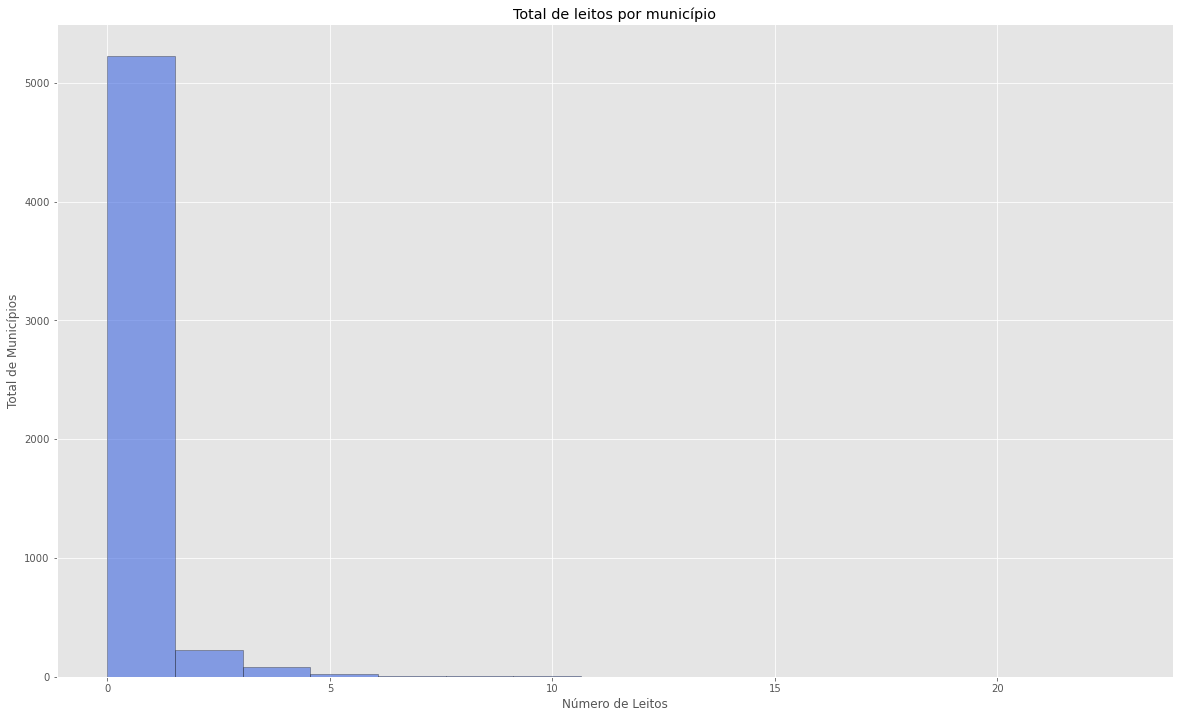

In [19]:
# Em seguida iremos verificar como é a distribuição de leitos pelo Brasil
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["LeitosUTItotal10mil"].hist(bins = 15, ec = "k", alpha = .6, color = "royalblue")
plt.title("Total de leitos por município")
plt.xlabel("Número de Leitos")
plt.ylabel("Total de Municípios")

Text(0, 0.5, 'Contagem de Municípios')

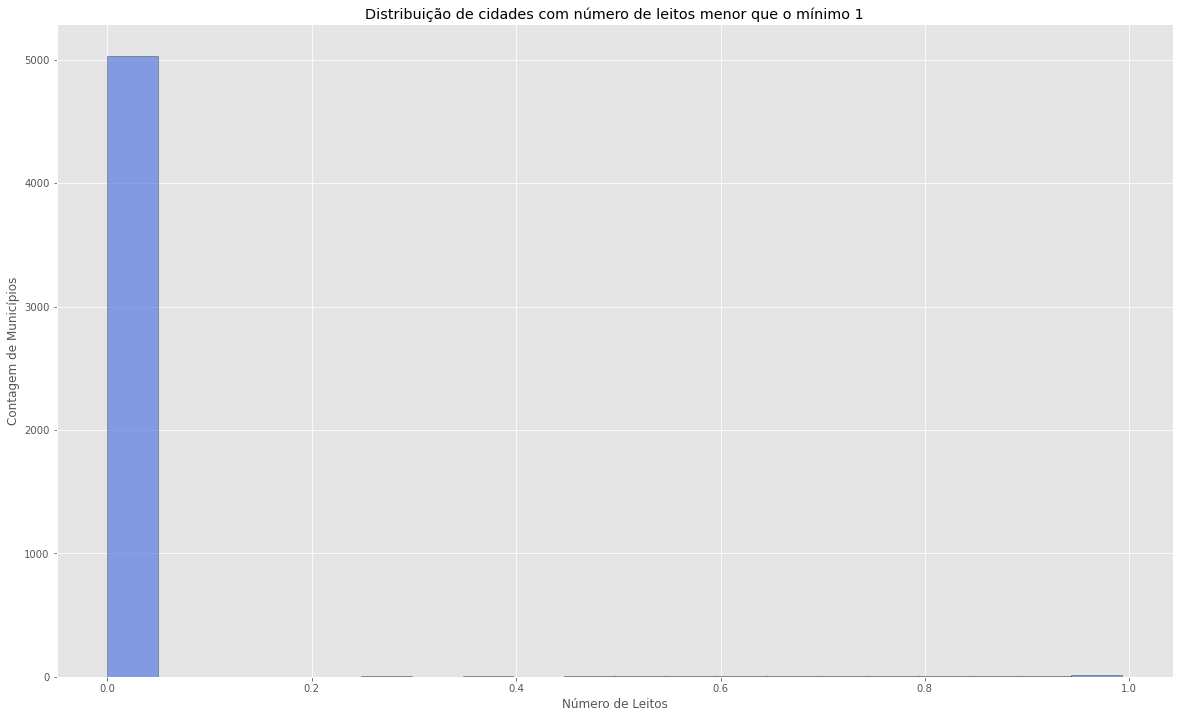

In [20]:
# Agora iremos verificar o total de municípios que possuem números de leitos menor que o mínimo desejável
plt.figure(figsize = (20, 12))
df[df["LeitosUTItotal10mil"] <1]["LeitosUTItotal10mil"].hist(bins = 20, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição de cidades com número de leitos menor que o mínimo 1")
plt.xlabel("Número de Leitos")
plt.ylabel("Contagem de Municípios")

Text(0, 0.5, 'Contagem de Municípios')

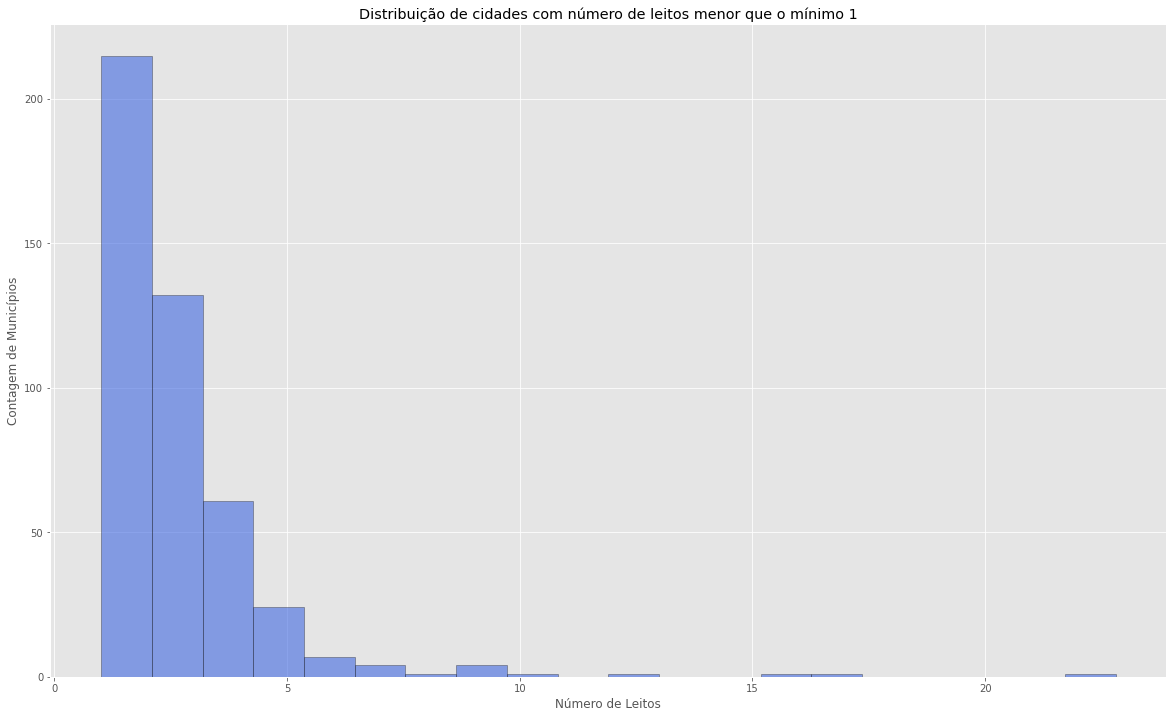

In [21]:
# A seguir verificamos quantos municípios possuem número de leitos maior que o mínimo desejável
plt.figure(figsize = (20, 12))
df[df["LeitosUTItotal10mil"] >1]["LeitosUTItotal10mil"].hist(bins = 20, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição de cidades com número de leitos menor que o mínimo 1")
plt.xlabel("Número de Leitos")
plt.ylabel("Contagem de Municípios")

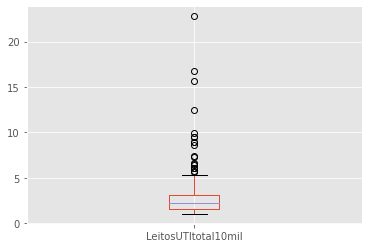

In [22]:
# Analisando a partir do Boxplot o total de leitos para cada município
df_leitos_uti_minimo = df.loc[df['LeitosUTItotal10mil'] >= 1]
df_leitos_uti_minimo['LeitosUTItotal10mil'].plot.box()

In [23]:
# Agora podemos filtrar por nome de Estado quantas cidades possuem quantidade de leito maior que o mínimo
df = pd.read_csv('./data/mapasInterativos/Leitos_de_UTI_em_2019.csv')
df['LeitosUTItotal10mil'] = df['Leitos_UTI_100mil_hab_Ind_1'] / 10
x = str(input('Digite o nome do Estado que você deseja analisar:'))
df_x = df.loc[(df['Nome_Estado'] == x) & 
                          (df['LeitosUTItotal10mil'] > 1)]

#Contar o número de municípios no Estado analisado
z = df[df['Nome_Estado'] == x].count()
tot_mun = z['Nome_Estado']

print('O estado do/a {} possui {} municípios'.format(x, tot_mun))
print('O total de municípios com número de leitos maior que o ideal é de {}'
      .format(df_x['Nome_Estado'].count()))

Digite o nome do Estado que você deseja analisar:Bahia
O estado do/a Bahia possui 417 municípios
O total de municípios com número de leitos maior que o ideal é de 20


#### 4.3 Panorama Geral da Distribuição de Dados

Após análise básica e superficial dos dados isoladamente, tais dados serão analisados em conjunto nas etapas a seguir. 

In [5]:
# Importando os arquivos de entrada e verificação das colunas disponíveis
dfDados = pd.read_csv('./data/DadosConsolidados.csv', delimiter=";", encoding='latin-1')
dfDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Codigo_Municipio           5570 non-null   int64  
 1   Nome_municipio             5570 non-null   object 
 2   Nome_Estado                5570 non-null   object 
 3   Região                     5570 non-null   object 
 4   Pop_Total                  5570 non-null   int64  
 5   Total_Obitos               5570 non-null   int64  
 6   Total_Medicos              5570 non-null   int64  
 7   Total_Enfermeiros          5570 non-null   int64  
 8   Total_Fisio_Respiratoria   5570 non-null   int64  
 9   Total_Fisio_Geral          5570 non-null   int64  
 10  Total_Profissionais_Saude  5570 non-null   int64  
 11  Total_Leitos_UTI           5570 non-null   int64  
 12  Total_Respiradores         5570 non-null   int64  
 13  Obitos_Por100mil           5570 non-null   float

In [25]:
# Normalização dos Dados para 100mil habitantes
dfDados['Obitos_Por100mil'] = (dfDados['Total_Obitos'] * 100000) / dfDados['Pop_Total']
dfDados['Medicos_Por100mil'] = (dfDados['Total_Medicos'] * 100000) / dfDados['Pop_Total']
dfDados['Enfermeiros_Por100mil'] = (dfDados['Total_Enfermeiros'] * 100000) / dfDados['Pop_Total']
dfDados['FisioResp_Por100mil'] = (dfDados['Total_Fisio_Respiratoria'] * 100000) / dfDados['Pop_Total']
dfDados['FisioGeral_Por100mil'] = (dfDados['Total_Fisio_Geral'] * 100000) / dfDados['Pop_Total']
dfDados['Profissionais_Por100mil'] = (dfDados['Total_Profissionais_Saude'] * 100000) / dfDados['Pop_Total']
dfDados['LeitosUTI_Por100mil'] = (dfDados['Total_Leitos_UTI'] * 100000) / dfDados['Pop_Total']
dfDados['Respiradores_Por100mil'] = (dfDados['Total_Respiradores'] * 100000) / dfDados['Pop_Total']

In [26]:
# Analisando estatisticamente os dados expostos acima
dfDados.describe()

Codigo_Municipio     Pop_Total  Total_Obitos  Total_Medicos  \
count      5.570000e+03  5.570000e+03   5570.000000    5570.000000   
mean       3.253591e+06  3.772839e+04      2.286176      74.247576   
std        9.849103e+05  2.214581e+05     47.310412     777.636417   
min        1.100015e+06  7.810000e+02      0.000000       0.000000   
25%        2.512126e+06  5.446500e+03      0.000000       3.000000   
50%        3.146280e+06  1.163100e+04      0.000000       6.000000   
75%        4.119190e+06  2.549050e+04      0.000000      17.000000   
max        5.300108e+06  1.225202e+07   2420.000000   43201.000000   

       Total_Enfermeiros  Total_Fisio_Respiratoria  Total_Fisio_Geral  \
count        5570.000000               5570.000000        5570.000000   
mean           48.066248                  0.595332          97.498923   
std           422.156712                 23.705774        1087.617156   
min             0.000000                  0.000000           0.000000   
25%             5.000000                  0.000000           4.000000   
50%            10.000000                  0.000000          14.000000   
75%            20.000000                  0.000000          36.000000   
max         23551.000000               1560.000000       56480.000000   

       Total_Profissionais_Saude  Total_Leitos_UTI  Total_Respiradores  ...  \
count                5570.000000       5570.000000         5570.000000  ...   
mean                  219.812747          5.729443           11.171095  ...   
std                  2266.333643         68.944380          129.820736  ...   
min                     0.000000          0.000000            0.000000  ...   
25%                    16.000000          0.000000            0.000000  ...   
50%                    31.000000          0.000000            0.000000  ...   
75%                    74.000000          0.000000            2.000000  ...   
max                123232.000000       3504.000000         7173.000000  ...   

       Medicos_Por100mil  Enfermeiros_Por100mil  FisioResp_Por100mil  \
count        5570.000000            5570.000000          5570.000000   
mean           82.056853              93.889039             0.186152   
std            83.556997              47.203000             3.814937   
min             0.000000               0.000000             0.000000   
25%            36.999964              63.324858             0.000000   
50%            59.375165              84.488739             0.000000   
75%           100.082360             113.242269             0.000000   
max          2770.705407             503.868078           234.100663   

       FisioGeral_Por100mil  TotalProf_Por100mil  TotalLeitos_Por100mil  \
count           5570.000000         5.570000e+03            5570.000000   
mean             209.910111         2.505568e+03              65.308761   
std              473.557062         2.583305e+04             785.869852   
min                0.000000         0.000000e+00               0.000000   
25%               31.668182         1.824000e+02               0.000000   
50%              126.393429         3.534000e+02               0.000000   
75%              281.690141         8.435000e+02               0.000000   
max            27133.436773         1.404673e+06           39940.700000   

       TotalResp_Por100mil  Profissionais_Por100mil  LeitosUTI_Por100mil  \
count          5570.000000              5570.000000          5570.000000   
mean            127.336697               385.856003             2.248294   
std            1479.775544               500.274452             9.170975   
min               0.000000                 0.000000             0.000000   
25%               0.000000               171.043254             0.000000   
50%               0.000000               294.899208             0.000000   
75%              22.800000               491.189384             0.000000   
max           81762.200000             27249.806051           228.026848 

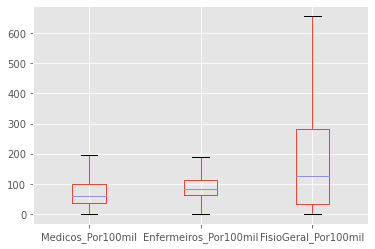

In [27]:
# Criando um boxplot com os dados de médicos, enfermeiros e fisioterapeutas gerais
# Note que os outliers foram retirados, uma vez que os mesmos poluiam a imagem
dfDados[['Medicos_Por100mil', 'Enfermeiros_Por100mil','FisioGeral_Por100mil']].plot.box(showfliers=False)

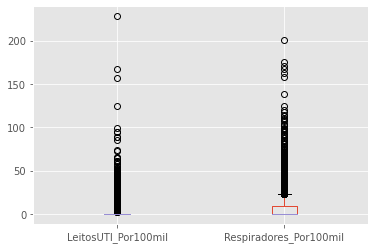

In [28]:
# Agora iremos analisar os dados de leitos e respiradores com outliers
dfDados[['LeitosUTI_Por100mil','Respiradores_Por100mil']].plot.box(showfliers=True)

#### 4.5 Análise de Correlação entre as variáveis

In [8]:
# Fazendo uma cópia do dataset com todas as colunas
dfDadosCompleto = dfDados

In [29]:
# Primeiramente, iremos retirar os dados não normalizados
dfDados= dfDados.drop(['Total_Obitos', 'Total_Medicos', 'Total_Enfermeiros', 
              'Total_Fisio_Respiratoria', 'Total_Fisio_Geral',
                      'Total_Profissionais_Saude', 'Total_Leitos_UTI',
                      'Total_Respiradores'], axis=1)

In [30]:
# Tabela de correlação das variáveis estudadas
dfDados.corr()

Codigo_Municipio  Pop_Total  Obitos_Por100mil  \
Codigo_Municipio                 1.000000  -0.002373         -0.110207   
Pop_Total                       -0.002373   1.000000          0.306803   
Obitos_Por100mil                -0.110207   0.306803          1.000000   
Medicos_Por100mil                0.183382   0.233981          0.205639   
Enfermeiros_Por100mil            0.130042   0.120971          0.114531   
FisioResp_Por100mil              0.010488   0.062164          0.012154   
FisioGeral_Por100mil             0.138119   0.017456         -0.000771   
TotalProf_Por100mil              0.012553   0.976804          0.259508   
TotalLeitos_Por100mil            0.013794   0.962606          0.272945   
TotalResp_Por100mil              0.014116   0.978920          0.268793   
Profissionais_Por100mil          0.173642   0.067018          0.044423   
LeitosUTI_Por100mil              0.066368   0.240379          0.215647   
Respiradores_Por100mil           0.132856   0.239691          0.212968   

                         Medicos_Por100mil  Enfermeiros_Por100mil  \
Codigo_Municipio                  0.183382               0.130042   
Pop_Total                         0.233981               0.120971   
Obitos_Por100mil                  0.205639               0.114531   
Medicos_Por100mil                 1.000000               0.467085   
Enfermeiros_Por100mil             0.467085               1.000000   
FisioResp_Por100mil               0.047899               0.051912   
FisioGeral_Por100mil              0.087879               0.137994   
TotalProf_Por100mil               0.232034               0.141069   
TotalLeitos_Por100mil             0.239821               0.151224   
TotalResp_Por100mil               0.231627               0.144261   
Profissionais_Por100mil           0.294280               0.302993   
LeitosUTI_Por100mil               0.507654               0.339220   
Respiradores_Por100mil            0.573027               0.411487   

                         FisioResp_Por100mil  FisioGeral_Por100mil  \
Codigo_Municipio                    0.010488              0.138119   
Pop_Total                           0.062164              0.017456   
Obitos_Por100mil                    0.012154             -0.000771   
Medicos_Por100mil                   0.047899              0.087879   
Enfermeiros_Por100mil               0.051912              0.137994   
FisioResp_Por100mil                 1.000000              0.000948   
FisioGeral_Por100mil                0.000948              1.000000   
TotalProf_Por100mil                 0.076387              0.047964   
TotalLeitos_Por100mil               0.080311              0.033182   
TotalResp_Por100mil                 0.071165              0.030799   
Profissionais_Por100mil             0.013796              0.974293   
LeitosUTI_Por100mil                 0.035412              0.040190   
Respiradores_Por100mil              0.034986              0.055012   

                         TotalProf_Por100mil  TotalLeitos_Por100mil  \
Codigo_Municipio                    0.012553               0.013794   
Pop_Total                           0.976804               0.962606   
Obitos_Por100mil                    0.259508               0.272945   
Medicos_Por100mil                   0.232034               0.239821   
Enfermeiros_Por100mil               0.141069               0.151224   
FisioResp_Por100mil                 0.076387               0.080311   
FisioGeral_Por100mil                0.047964               0.033182   
TotalProf_Por100mil                 1.000000               0.986565   
TotalLeitos_Por100mil               0.986565               1.000000   
TotalResp_Por100mil                 0.991613               0.990277   
Profissionais_Por100mil             0.097468               0.085734   
LeitosUTI_Por100mil                 0.224874               0.287601   
Respiradores_Por100mil              0.223864               0.255113   

                         TotalResp_Por100mil 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020404BD0DF0>,
      dtype=object)

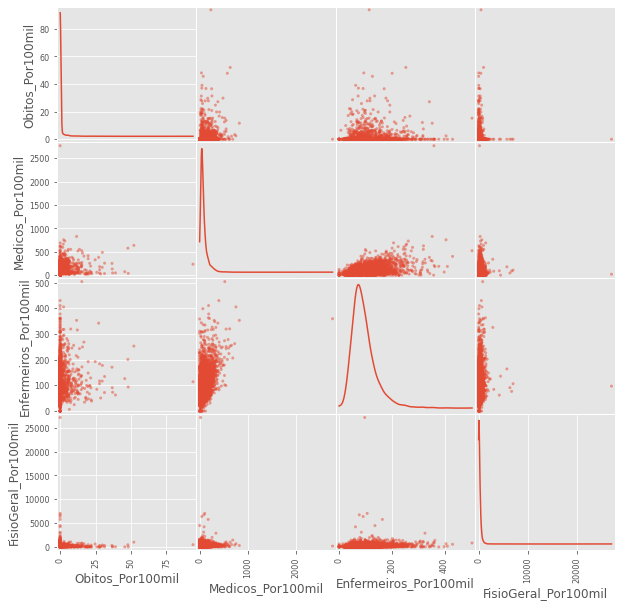

In [31]:
# Agora iremos criar gráficos para analisar a correlação entre as variáveis
from pandas.plotting import scatter_matrix

scatter_matrix(dfDados[['Obitos_Por100mil','Medicos_Por100mil','Enfermeiros_Por100mil','FisioGeral_Por100mil']], 
               figsize=(10, 10), diagonal='kde')

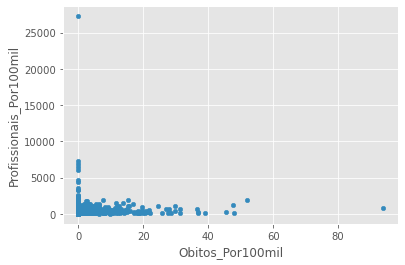

In [32]:
# Análise de correlação do número de óbitos por número de profissionais
dfDados.plot.scatter(x='Obitos_Por100mil', y='Profissionais_Por100mil')

In [59]:
# Filtrando os dados para retirar municipios que não tem leitos de UTI
# pois as próximas análises irão considerar essa variável como base
# e separando os minicipios sem leitos de UTI para fazer uma análise comparativa entre os 2 grupos
dfDadosSemLeitos = dfDadosCompleto.loc[dfDadosCompleto['Total_Leitos_UTI'] == 0]
dfDadosLeitos = dfDadosCompleto.loc[dfDadosCompleto['Total_Leitos_UTI'] > 0]

In [60]:
# Calcula novas variáveis referentes à proporção de Médicos, Enfermeiros e Fisioterapeutas 
# por leitos de UTI

# Normalizando o total de obitos para a mesma base de leitosUTI
dfDadosLeitos['Obitos10mil'] = ((dfDadosLeitos['Total_Obitos'] * 100000) / dfDadosLeitos['Pop_Total']) / 10

# Para o dataset de municipios sem leitos normaliza o total de obitos e o número de médicos
dfDadosSemLeitos['Obitos10mil'] = ((dfDadosSemLeitos['Total_Obitos'] * 100000) / dfDadosSemLeitos['Pop_Total']) / 10
dfDadosSemLeitos['Medicos10mil'] = ((dfDadosSemLeitos['Total_Medicos'] * 100000) / dfDadosSemLeitos['Pop_Total']) / 10

# Primeiro, adiciona a quantidade de leitos por 10 mil habitantes
dfDadosLeitos['LeitosUTItotal10mil'] = dfDadosLeitos['TotalLeitos_Por100mil'] / 10

# Segundo, adiciona as variáveis de Medicos, Enfermeiros e Fisioterapeutas por Leito
dfDadosLeitos['MedicosPorLeito'] = dfDadosLeitos['Total_Medicos'] / dfDadosLeitos['Total_Leitos_UTI']
dfDadosLeitos['EnfermeirosPorLeito'] = dfDadosLeitos['Total_Enfermeiros'] / dfDadosLeitos['Total_Leitos_UTI']
dfDadosLeitos['FisiosPorLeito'] = dfDadosLeitos['Total_Fisio_Geral'] / dfDadosLeitos['Total_Leitos_UTI']



<ipython-input-60-e27086bd0c90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDadosLeitos['Obitos10mil'] = ((dfDadosLeitos['Total_Obitos'] * 100000) / dfDadosLeitos['Pop_Total']) / 10
<ipython-input-60-e27086bd0c90>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDadosSemLeitos['Obitos10mil'] = ((dfDadosSemLeitos['Total_Obitos'] * 100000) / dfDadosSemLeitos['Pop_Total']) / 10
<ipython-input-60-e27086bd0c90>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [61]:
# Exclui as colunas que não serão utilizadas nas próximas análises
# Primeiramente, iremos retirar os dados não normalizados
dfDadosLeitos = dfDadosLeitos.drop(['Pop_Total','Total_Medicos', 'Total_Enfermeiros', 
              'Total_Fisio_Respiratoria', 'Total_Fisio_Geral',
                      'Total_Profissionais_Saude', 'Total_Leitos_UTI',
                      'Obitos_Por100mil','Medicos_Por100mil','Enfermeiros_Por100mil','FisioResp_Por100mil','FisioGeral_Por100mil',
                      'TotalProf_Por100mil','TotalLeitos_Por100mil','TotalResp_Por100mil',
                      'TotalProf_Por100mil','TotalLeitos_Por100mil','TotalResp_Por100mil','Total_Respiradores'], axis=1)

dfDadosSemLeitos = dfDadosSemLeitos.drop(['Pop_Total','Total_Medicos', 'Total_Enfermeiros', 
              'Total_Fisio_Respiratoria', 'Total_Fisio_Geral',
                      'Total_Profissionais_Saude', 'Total_Leitos_UTI',
                      'Obitos_Por100mil','Medicos_Por100mil','Enfermeiros_Por100mil','FisioResp_Por100mil','FisioGeral_Por100mil',
                      'TotalProf_Por100mil','TotalLeitos_Por100mil','TotalResp_Por100mil',
                      'TotalProf_Por100mil','TotalLeitos_Por100mil','TotalResp_Por100mil','Total_Respiradores'], axis=1)

In [70]:
# Emite relatórios para análise estatística para essas novas variáveis
dfDadosLeitos.describe()

# Análise:
# Os dados indicam que na média, para os municípios que tem leitos de UTI disponíveis (536 ou 9% do total)
# estão dentro dos padrões desejáveis, com excessão dos indicadores médos de Enfemeiros por Leitos com média 7.9

# Referências:
# Segundo recomendações da OMS e do Ministério da Saúde, a relação ideal de leitos de UTI é de 1 a 3 leitos para cada 10mil habitantes 
# (relatório disponibilizado pela AMIB - março, 2020).(artigo retirado de "https://www.amib.org.br/fileadmin/user_upload/amib/2020/abril/28/dados_uti_amib.pdf")
# "Recomenda-se 01 (um) médico para cada 10 (dez) leitos ou fração [...]"
# Referência: site da AMIB (https://www.amib.org.br/defesa/perguntas-frequente/)


Codigo_Municipio  Total_Obitos  Obitos10mil  LeitosUTItotal10mil  \
count      5.360000e+02    536.000000   536.000000           536.000000   
mean       3.435941e+06     22.557836     0.311849             2.336362   
std        8.579178e+05    151.078690     0.719264             1.952504   
min        1.100023e+06      0.000000     0.000000             0.240000   
25%        3.112779e+06      0.000000     0.000000             1.247500   
50%        3.507556e+06      1.000000     0.046123             1.900000   
75%        4.114075e+06      4.000000     0.324757             2.880000   
max        5.300108e+06   2420.000000     9.371996            22.800000   

       MedicosPorLeito  EnfermeirosPorLeito  FisiosPorLeito  
count       536.000000           536.000000      536.000000  
mean         12.427528             7.951609       14.300982  
std          11.174583             4.792553       18.413473  
min           0.400000             0.480000        0.000000  
25%           6.665865             4.920900        5.988372  
50%          10.278256             6.798148       11.204723  
75%          14.834375             9.601840       17.785455  
max         185.000000            38.833333      343.500000

In [54]:
# Emite relatórios para análise estatística o datasem Municipios sem leitos para comparação com Municipios com leitos
dfDadosSemLeitos.describe()

Codigo_Municipio  Total_Obitos  Obitos10mil  Medicos10mil
count      5.034000e+03   5034.000000  5034.000000   5034.000000
mean       3.234175e+06      0.127731     0.025450      6.736265
std        9.955900e+05      1.408503     0.203633      5.168393
min        1.100015e+06      0.000000     0.000000      0.000000
25%        2.506128e+06      0.000000     0.000000      3.512917
50%        3.137568e+06      0.000000     0.000000      5.430490
75%        4.119645e+06      0.000000     0.000000      8.530241
max        5.222302e+06     49.000000     4.802224     69.083079

In [68]:
# Agrupa os datasets para geração de gráfico comparativo dos 2 grupos por total de óbitos 
# e total de óbitos por 10 mil habitantes
dfCompLeitos = pd.DataFrame()
dfCompLeitos['TotalObitosSemLeitos'] = [sum(dfDadosSemLeitos.Total_Obitos)]
#dfCompLeitos['TotalObitos10milSemLeitos'] = [sum(dfDadosSemLeitos.Obitos10mil)]
dfCompLeitos['TotalObitosComLeitos'] = [sum(dfDadosLeitos.Total_Obitos)]
#dfCompLeitos['TotalObitos10milComLeitos'] = [sum(dfDadosLeitos.Obitos10mil)]
dfCompLeitos

TotalObitosSemLeitos  TotalObitosComLeitos
0                   643                 12091

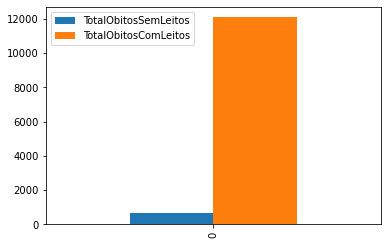

In [69]:
# Gera gráfico comparativo de numero absoluto de óbitos em Municípios com e sem leitos de UTI
dfCompLeitos.plot.bar()

In [49]:
# Exclui as colunas que não serão utilizadas nas próximas análises
# Primeiramente, iremos retirar os dados não normalizados
dfDadosLeitos = dfDadosLeitos.drop(['Total_Obitos'], axis=1)


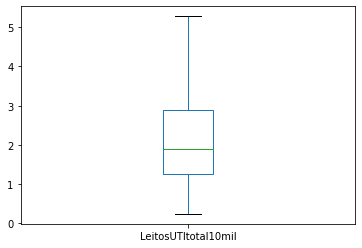

In [16]:
# Analise a distribuição de Leitos por 10 mil habitantrs através do gráfico de BoxPlot
dfDadosLeitos[['LeitosUTItotal10mil']].plot.box(showfliers=False)


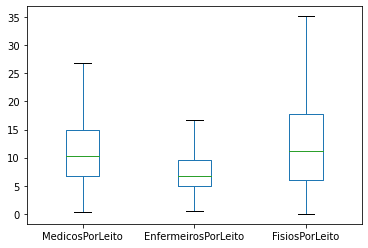

In [17]:
# Analise a distribuição da equipe médica através do gráfico de BoxPlot
dfDadosLeitos[['MedicosPorLeito','EnfermeirosPorLeito','FisiosPorLeito']].plot.box(showfliers=False)

In [18]:
# Verifica correlações com o número de óbitos
dfDadosLeitos.corr()

Total_Respiradores  Obitos10mil  LeitosUTItotal10mil  \
Total_Respiradores             1.000000     0.284535             0.099813   
Obitos10mil                    0.284535     1.000000             0.018709   
LeitosUTItotal10mil            0.099813     0.018709             1.000000   
MedicosPorLeito               -0.008039     0.046485            -0.322710   
EnfermeirosPorLeito           -0.057993     0.041532            -0.503754   
FisiosPorLeito                 0.001520     0.021015            -0.221428   

                     MedicosPorLeito  EnfermeirosPorLeito  FisiosPorLeito  
Total_Respiradores         -0.008039            -0.057993        0.001520  
Obitos10mil                 0.046485             0.041532        0.021015  
LeitosUTItotal10mil        -0.322710            -0.503754       -0.221428  
MedicosPorLeito             1.000000             0.658427        0.240178  
EnfermeirosPorLeito         0.658427             1.000000        0.308643  
FisiosPorLeito              0.240178             0.308643        1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017122A297C0>,
      dtype=object)

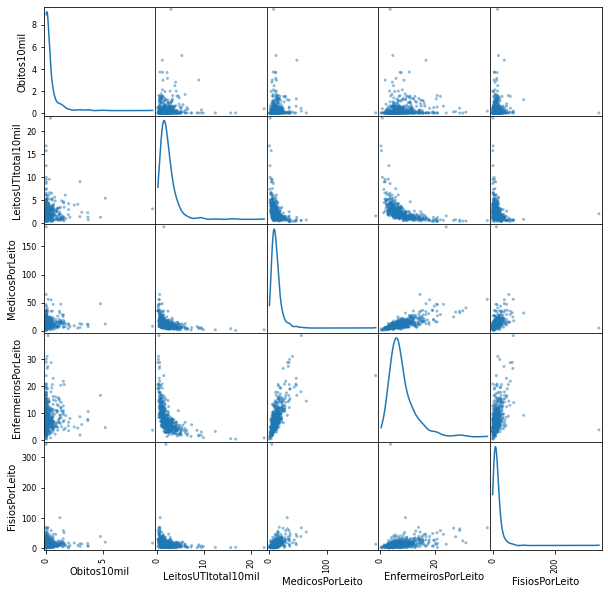

In [19]:
# Agora iremos criar gráficos para analisar a correlação entre as variáveis
from pandas.plotting import scatter_matrix

scatter_matrix(dfDadosLeitos[['Obitos10mil','LeitosUTItotal10mil','MedicosPorLeito','EnfermeirosPorLeito','FisiosPorLeito']], 
               figsize=(10, 10), diagonal='kde')

### 5. Discussão e Próximos Passos

Alguns pontos observados a partir da busca e coleta de dados, e posterior análise exploratória inicial foram:

**1)** Para os dados referentes a óbitos, será necessário obter dados mais atualizados pois os coletados são até 22 de Julho de 2020. Além disso, tais dados deverão ser normalizados.

**2)** O objetivo do trabalho é identificar se existe alguma relação entre o número de óbitos observado em determinadas regiões (Região, Estado e Município) e os profissionais (Médicos, Enfermeiros e Fisioterapeutas) e recursos (Leitos de UTI e Respiradores) existentes. Analisando inicialmente os números brutos, a relação encontrada é que locais com mais recursos tem mais óbitos, o que parece ser óbvio, pois mais recursos estão relacionados a municípios com maior população, e maior população resulta em um número maior de casos e óbitos. Deve-se destacar também a importância de normalizar todos os dados. Um exemplo importante da necessidade de normalização dos dados é quando comparamos o número de médicos por região, como no caso de Curitiba e Blumenau (Curitiba possui um total de médicos muito maior que os demais municípios, contudo quando normalizamos, cidades como Blumenau possuem valores por pessoa melhores).

Diante do exposto, o grupo entende que será necessário encontrar alguma métrica para identificar se os recursos de saúde para atender a casos graves de COVID-19 são apropriados, ou seja, se estão de acordo com normais estabelecidas que indiquem, por exemplo, quantos médicos, enfermeiros e fisioterapeutas é indicado por habitantes ou leitos de UTI disponíveis.
A partir dessas métricas iremos realizar novas análises para identificar possíveis correlações.
